Importing modules

In [5]:
import numpy as np
import os
import matplotlib.pyplot as plt
# from sklearn.metrics import accuracy_score
from Layer import *
from network import Network
from activation_func import tanh, tanh_prime, sigmoid, sigmoid_prime, softmax, softmax_prime, relu, relu_prime
from loss_func import mse, mse_prime, cross_entropy, cross_entropy_prime
from data_func import vectorize_labels, k_fold, import_data
from performance_func import plot_error, plot_confusion_matrix
from network_queue import Queue


Importing data

In [6]:
# import data and initialize seed
np.random.seed(10)

# import data
training_size = 60000
normalize = True
training, labels, test, original_test_labels, test_labels = import_data(size=training_size, normalize=normalize)

# intializing queue
queue = Queue(training, labels, test, test_labels, original_test_labels)

# specify input and output sizes
features = 784
output_classes = 10

# hyper parameters
learning_rate = 5e-3
hidden_layers = [30]
max_epochs = 5
batch_size = 1
weight_decay = 0.01
momentum = False



Setting configuration

In [ ]:
architectures = [[30],[100]]
for layers in architectures:
    queue.add(netparams={
        "hidden_layers": layers,
        "features": features,
        "output_classes": output_classes,
        "activation": relu,
        "activation_prime": relu_prime,
        "loss_activation": softmax,
        "loss_activation_prime": softmax_prime,
        "loss": cross_entropy,
        "loss_prime": cross_entropy_prime
    },
    folds=5,
    params={"epochs": 5,
            "learning_rate": 5e-3,
            "batch_size": 1,
            "momentum": False,
            "weight_decay": 0.01})

results, accuracies = queue.execute()


Fitting model 1/10
epoch 1/5   training error=0.417377  validation error=0.301121 validation accuracy=0.923833 ETA=0:00:42 tpe=10.526301
epoch 2/5   training error=0.315723  validation error=0.296067 validation accuracy=0.918667 ETA=0:00:30 tpe=-0.384569
epoch 3/5   training error=0.306219  validation error=0.292537 validation accuracy=0.925083 ETA=0:00:20 tpe=-0.021899
epoch 4/5   training error=0.302448  validation error=0.277206 validation accuracy=0.929500 ETA=0:00:10 tpe=-0.227346
epoch 5/5   training error=0.298655  validation error=0.278472 validation accuracy=0.928667 ETA=0:00:00 tpe=0.307886
Average epoch computational time:  10.200372982025147
Fitting model 2/10
epoch 1/5   training error=0.427320  validation error=0.337111 validation accuracy=0.915833 ETA=0:00:37 tpe=9.160388
epoch 2/5   training error=0.320476  validation error=0.328213 validation accuracy=0.914750 ETA=0:00:27 tpe=-0.010530
epoch 3/5   training error=0.309099  validation error=0.318637 validation accuracy=0

Train the network

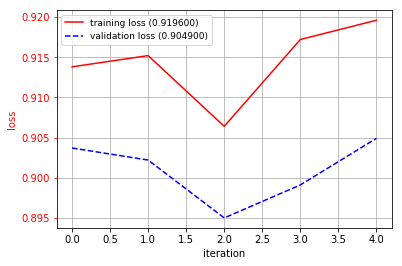

In [4]:
plot_error(accuracies[10:], accuracies[5:10])

In [10]:
%%time
# set up the network with specified layers, loss, and activation
net = Network(hidden_layers, features, output_classes,
              activation=relu, activation_prime=relu_prime,
              loss_activation=softmax, loss_activation_prime=softmax_prime,
              loss=cross_entropy, loss_prime=cross_entropy_prime)
# prepare data for training
fold_train_data, fold_train_labels, fold_val_data, fold_val_labels = k_fold(training, labels, k=5, n=5)

# train the model on training data and labels using specific hyper-parameters
errors, val_errors, val_accs = net.fit(fold_train_data, fold_train_labels, fold_val_data, fold_val_labels,
                             max_epochs, learning_rate, batch_size, momentum, weight_decay)

# print the accuracy
print("The test accuracy of the network is: {}".format(
      net.accuracy(x=test, y_true=original_test_labels, errors=errors, val_errors=val_errors)))

epoch 1/10   training error=3.235184  validation error=2.029763 validation accuracy=0.345000 ETA=0:00:20 tpe=2.268548
epoch 2/10   training error=1.597299  validation error=1.363758 validation accuracy=0.591667 ETA=0:00:17 tpe=-0.106046
epoch 3/10   training error=1.172808  validation error=1.088734 validation accuracy=0.668333 ETA=0:00:15 tpe=0.012792
epoch 4/10   training error=0.956478  validation error=0.929207 validation accuracy=0.706667 ETA=0:00:13 tpe=0.016697
epoch 5/10   training error=0.818982  validation error=0.827835 validation accuracy=0.740000 ETA=0:00:11 tpe=0.006900
epoch 6/10   training error=0.722251  validation error=0.748260 validation accuracy=0.763333 ETA=0:00:09 tpe=-0.010705
epoch 7/10   training error=0.655422  validation error=0.693233 validation accuracy=0.781667 ETA=0:00:06 tpe=-0.022834
epoch 8/10   training error=0.607134  validation error=0.653147 validation accuracy=0.798333 ETA=0:00:04 tpe=0.007626
epoch 9/10   training error=0.562559  validation erro

Plot results

In [ ]:
plot_error(accuracies[:5], accuracies[5:10])

